<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.939114,58.070066,72.280610,0.712525,235.002314,232.966635,2.035679
1,0.0,1.0,88.961797,60.840648,49.155918,-6.676809,202.281554,207.398317,-5.116763
2,0.0,2.0,23.312397,30.419057,94.230657,0.844906,158.807016,159.227916,-0.420899
3,0.0,3.0,20.971782,41.975596,97.809276,-0.466106,170.290548,171.746062,-1.455514
4,0.0,4.0,21.953560,25.335170,28.014716,7.860543,93.163989,86.032089,7.131901
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,72.970108,23.561249,99.127909,-7.362761,198.296504,200.431723,-2.135218
29996,999.0,26.0,91.258425,61.317351,30.886915,4.872805,198.335497,197.840558,0.494939
29997,999.0,27.0,63.897909,73.873179,37.897401,4.108710,189.777199,190.336572,-0.559373
29998,999.0,28.0,65.936755,99.478427,66.208416,5.442613,247.066211,245.688769,1.377443


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    93.939114  58.070066  72.280610  0.712525  235.002314   
      1.0    88.961797  60.840648  49.155918 -6.676809  202.281554   
      2.0    23.312397  30.419057  94.230657  0.844906  158.807016   
      3.0    20.971782  41.975596  97.809276 -0.466106  170.290548   
      4.0    21.953560  25.335170  28.014716  7.860543   93.163989   
...                ...        ...        ...       ...         ...   
999.0 25.0   72.970108  23.561249  99.127909 -7.362761  198.296504   
      26.0   91.258425  61.317351  30.886915  4.872805  198.335497   
      27.0   63.897909  73.873179  37.897401  4.108710  189.777199   
      28.0   65.936755  99.478427  66.208416  5.442613  247.066211   
      29.0   24.044840  22.794545  40.165781  0.057871   97.063037   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    232.966635  2.035679  
      1.0    207.398317 -5.116763  
      2.0    159.227916 -0.420899  
      3.0    171.746062 -1.455514  
      4.0     86.032089  7.131901  
...                 ...       ...  
999.0 25.0   200.431723 -2.135218  
      26.0   197.840558  0.494939  
      27.0   190.336572 -0.559373  
      28.0   245.688769  1.377443  
      29.0    97.205017 -0.141980  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    93.939114  58.070066  72.280610  0.712525  235.002314   
      1.0    88.961797  60.840648  49.155918 -6.676809  202.281554   
      2.0    23.312397  30.419057  94.230657  0.844906  158.807016   
      3.0    20.971782  41.975596  97.809276 -0.466106  170.290548   
      4.0    21.953560  25.335170  28.014716  7.860543   93.163989   
...                ...        ...        ...       ...         ...   
999.0 25.0   72.970108  23.561249  99.127909 -7.362761  198.296504   
      26.0   91.258425  61.317351  30.886915  4.872805  198.335497   
      27.0   63.897909  73.873179  37.897401  4.108710  189.777199   
      28.0   65.936755  99.478427  66.208416  5.442613  247.066211   
      29.0   24.044840  22.794545  40.165781  0.057871   97.063037   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    232.966635  2.035679  
      1.0    207.398317 -5.116763  
      2.0    159.227916 -0.420899  
      3.0    171.746062 -1.455514  
      4.0     86.032089  7.131901  
...                 ...       ...  
999.0 25.0   200.431723 -2.135218  
      26.0   197.840558  0.494939  
      27.0   190.336572 -0.559373  
      28.0   245.688769  1.377443  
      29.0    97.205017 -0.141980  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,93.939114,58.070066,72.280610,0.712525,235.002314,232.966635,2.035679
1,0.0,1.0,88.961797,60.840648,49.155918,-6.676809,202.281554,207.398317,-5.116763
2,0.0,2.0,23.312397,30.419057,94.230657,0.844906,158.807016,159.227916,-0.420899
3,0.0,3.0,20.971782,41.975596,97.809276,-0.466106,170.290548,171.746062,-1.455514
4,0.0,4.0,21.953560,25.335170,28.014716,7.860543,93.163989,86.032089,7.131901
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,72.970108,23.561249,99.127909,-7.362761,198.296504,200.431723,-2.135218
29996,999.0,26.0,91.258425,61.317351,30.886915,4.872805,198.335497,197.840558,0.494939
29997,999.0,27.0,63.897909,73.873179,37.897401,4.108710,189.777199,190.336572,-0.559373
29998,999.0,28.0,65.936755,99.478427,66.208416,5.442613,247.066211,245.688769,1.377443


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    93.939114  58.070066  72.280610  0.712525  235.002314   
      1.0    88.961797  60.840648  49.155918 -6.676809  202.281554   
      2.0    23.312397  30.419057  94.230657  0.844906  158.807016   
      3.0    20.971782  41.975596  97.809276 -0.466106  170.290548   
      4.0    21.953560  25.335170  28.014716  7.860543   93.163989   
...                ...        ...        ...       ...         ...   
999.0 25.0   72.970108  23.561249  99.127909 -7.362761  198.296504   
      26.0   91.258425  61.317351  30.886915  4.872805  198.335497   
      27.0   63.897909  73.873179  37.897401  4.108710  189.777199   
      28.0   65.936755  99.478427  66.208416  5.442613  247.066211   
      29.0   24.044840  22.794545  40.165781  0.057871   97.063037   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    232.966635  2.035679  
      1.0    207.398317 -5.116763  
      2.0    159.227916 -0.420899  
      3.0    171.746062 -1.455514  
      4.0     86.032089  7.131901  
...                 ...       ...  
999.0 25.0   200.431723 -2.135218  
      26.0   197.840558  0.494939  
      27.0   190.336572 -0.559373  
      28.0   245.688769  1.377443  
      29.0    97.205017 -0.141980  

[30000 rows x 7 columns]

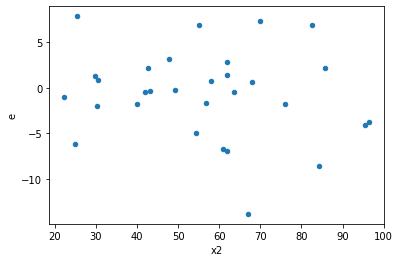

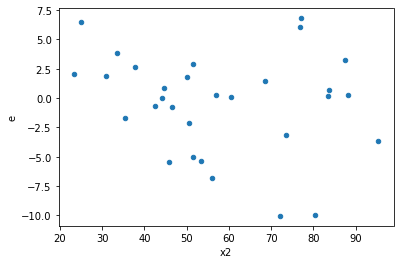

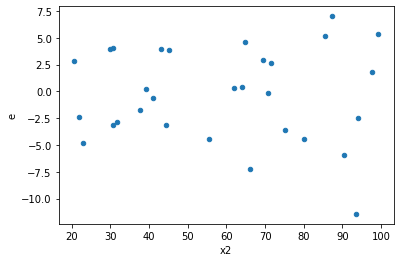

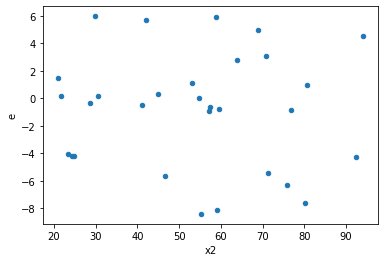

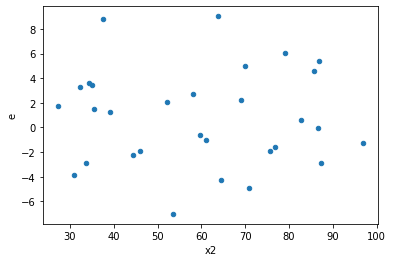

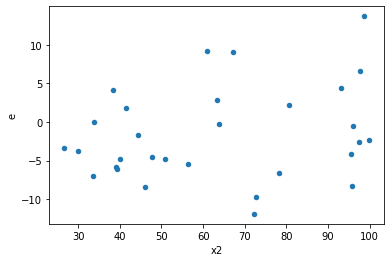

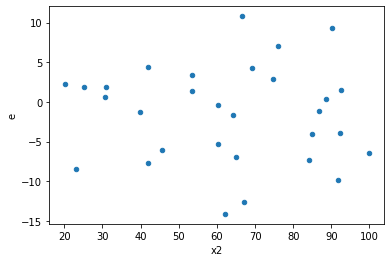

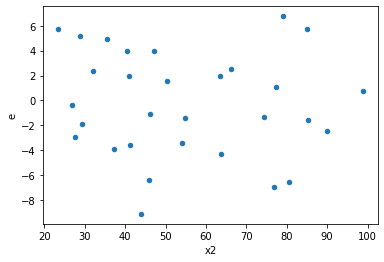

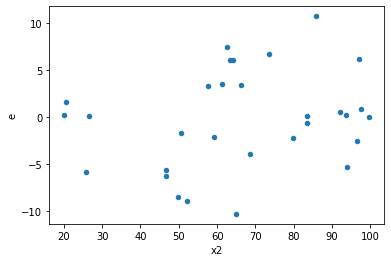

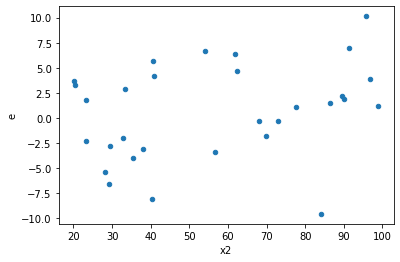

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,16.0,127.55056355418137,525.6293245584527,15.94382044427267,32.851832784903294,2.0604743323426167,0.20793143735109454,0.8960342813244527,0.10396571867554727,Reject005=1 : Homoscedasticity
1.0,14.0,10.0,219.9262180249737,191.3722794929821,15.709015573212408,19.13722794929821,1.2182321584766722,0.7678626537525508,0.6160686731237246,0.3839313268762754,Reject005=1 : Homoscedasticity
3.0,16.0,8.0,171.44623716942598,126.35540173200846,10.715389823089124,15.794425216501057,1.473994458182736,0.5916036460953977,0.7041981769523011,0.29580182304769886,Reject005=1 : Homoscedasticity
5.0,9.0,15.0,344.09439427441436,571.351181259068,38.232710474934926,38.09007875060453,0.9962693797390091,0.964802656176307,0.5175986719118465,0.4824013280881535,Reject005=1 : Homoscedasticity
9.0,11.0,13.0,116.77632623478185,238.2312701833834,10.616029657707442,18.325482321798724,1.726208659232039,0.3469898735223458,0.8265050632388271,0.1734949367611729,Reject005=1 : Homoscedasticity
10.0,13.0,11.0,160.0098307429411,302.68814578493254,12.308448518687776,27.517104162266595,2.235627351447885,0.18942148369034761,0.9052892581548262,0.09471074184517381,Reject005=1 : Homoscedasticity
12.0,11.0,13.0,97.67736641572684,715.3679711015196,8.879760583247894,55.028305469347664,6.197048327312031,0.002821228950820709,0.9985893855245896,0.0014106144754103545,Reject005=0 : Heteroscedasticity
14.0,13.0,11.0,299.27196031040717,278.5172374977632,23.020920023877473,25.319748863433016,1.0998582522840608,0.8852012201648434,0.5573993899175783,0.4426006100824217,Reject005=1 : Homoscedasticity
16.0,15.0,9.0,151.3715085532949,265.92782476993466,10.091433903552993,29.547536085548295,2.9279819268444296,0.107969513008769,0.9460152434956155,0.0539847565043845,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,16.0,127.55056355418137,525.6293245584527,15.94382044427267,32.851832784903294,2.0604743323426167,0.20793143735109454,Reject005=1 : Homoscedasticity
1.0,14.0,10.0,219.9262180249737,191.3722794929821,15.709015573212408,19.13722794929821,1.2182321584766722,0.7678626537525508,Reject005=1 : Homoscedasticity
2.0,14.0,10.0,314.67896824317586,202.07940437003975,22.477069160226847,20.207940437003977,0.8990469483789243,0.8326222104855214,Reject005=1 : Homoscedasticity
3.0,16.0,8.0,171.44623716942598,126.35540173200846,10.715389823089124,15.794425216501057,1.473994458182736,0.5916036460953977,Reject005=1 : Homoscedasticity
4.0,14.0,10.0,336.98489747985576,69.98879395148128,24.070349819989698,6.998879395148128,0.2907676642628505,0.035229693735072225,Reject005=0 : Heteroscedasticity
5.0,9.0,15.0,344.09439427441436,571.351181259068,38.232710474934926,38.09007875060453,0.9962693797390091,0.964802656176307,Reject005=1 : Homoscedasticity
6.0,9.0,15.0,420.27174730804177,490.36780239411775,46.696860812004644,32.69118682627452,0.7000724729202866,0.5994053584453541,Reject005=1 : Homoscedasticity
7.0,12.0,12.0,243.04788258009066,117.57661452445491,20.253990215007555,9.798051210371243,0.4837590571714211,0.2228459461207901,Reject005=1 : Homoscedasticity
8.0,13.0,11.0,338.3997371549587,191.62202737710524,26.0307490119199,17.420184307009567,0.6692156379761712,0.48596581416712864,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      871
Reject005=0 : Heteroscedasticity    129
Name: Result_test, dtype: int64